In [1]:
import os
os.chdir('..')

In [2]:
import pandas as pd

In [3]:
df_train = pd.read_csv('data/train_processed.csv')
X_train, y_train = df_train.drop(columns=['FULLVAL']), df_train['FULLVAL']
df_val = pd.read_csv('data/val_processed.csv')
X_val, y_val = df_val.drop(columns=['FULLVAL']), df_val['FULLVAL']

In [4]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error

import matplotlib.pyplot as plt

In [5]:
lasso_model = Lasso(alpha=.001)
lasso_model.fit(X_train, y_train)

/home/antoni/miniconda3/envs/best/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.434e+17, tolerance: 7.370e+13
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=0.001)

In [6]:
mean_absolute_error(y_train, lasso_model.predict(X_train))

2073451.1941308042

In [7]:
mean_absolute_error(y_val, lasso_model.predict(X_val))

2118717.410333047

<BarContainer object of 124 artists>

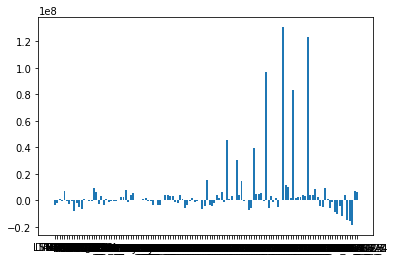

In [8]:
plt.bar(x=lasso_model.feature_names_in_, height=lasso_model.coef_)

In [9]:
import numpy as np

In [10]:
(np.abs(lasso_model.coef_) > .05*1e8).mean()

0.3064516129032258

In [11]:
relevant_cols = lasso_model.feature_names_in_[np.abs(lasso_model.coef_) > .01*1e8]

In [12]:
X_train = X_train[relevant_cols]
X_val = X_val[relevant_cols]

In [13]:
from sklearn.tree import DecisionTreeRegressor

In [14]:
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

DecisionTreeRegressor()

In [15]:
mean_absolute_error(y_train, model.predict(X_train))

383.4193813282308

In [16]:
mean_absolute_error(y_val, model.predict(X_val))

224194.09616815476

In [17]:
from xgboost import XGBRegressor

/home/antoni/miniconda3/envs/best/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [49]:
model = XGBRegressor(n_estimators=10)
model.fit(X_train, y_train)

/home/antoni/miniconda3/envs/best/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=10, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [50]:
mean_absolute_error(y_train, model.predict(X_train))

231847.15562905013

In [51]:
mean_absolute_error(y_val, model.predict(X_val))

/home/antoni/miniconda3/envs/best/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


271686.83890860423

In [77]:
summary_df = pd.DataFrame({
    'decile': pd.qcut(y_val, 10),
    'actual': y_val,
    'predicted': model.predict(X_val)
})
summary_df = summary_df.assign(
    rel_error=np.abs(summary_df['predicted'] - summary_df['actual'])/summary_df['actual']
)

/home/antoni/miniconda3/envs/best/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


In [78]:
summary_df.groupby('decile', as_index=False).mean('rel_error')[['decile', 'rel_error']]

,decile,rel_error
0,"(-0.001, 171568.0]",NaN
1,"(171568.0, 270519.0]",0.421167
2,"(270519.0, 358000.0]",0.343313
3,"(358000.0, 442400.0]",0.396623
4,"(442400.0, 504000.0]",0.285873
5,"(504000.0, 571600.0]",0.195925
6,"(571600.0, 639000.0]",0.152734
7,"(639000.0, 829400.0]",0.194575
8,"(829400.0, 1445900.0]",0.188736
9,"(1445900.0, 168125000.0]",0.297183
